<span style="font-size:1em; color:#d8506b">**Note**: We've spent week 5 with Logistic Regression and lightning talks, so Week 4 Prework covers both week 4 and 5.</span>

# Week 6 Prework

## Prework Topics


<span style="font-size:1.5em; color:#1F7499">Decision Trees/Random Forest</span>
1. Machine Learning - CART (aka Decision Trees and Random Forests)

### What are CART Models?

CART stands for Classification And Regression Trees. The easiest way to think of how Decision Trees make "decisions":
1. Your entire dataset is the trunk
2. Each branch is a decision
3. End target value is a leaf

As usual, my favorite way of explaining everything is to use dogs and cats! Let's say we are predicting whether the next animal is a dog or a cat. We have features height and weight. So, Decision Trees makes decisions! Assuming if the animals weight is larger than 15 pounds, it is most likely a dog. The tree splits the dataset with into 2 branches, one with all the animals that weigh lower than 15 and animals weighing more than 15 points. Then in each branch, DT will make another decision either on weight again or height. Let's say we set the Decision Tree parameter to only 2 decisions and let's assume it decides to pick height instead of weight. For each branch, if an animal is taller than 1.5 feet, it is more likely to be a dog. Since we only told the DT to make 2 decisions, this is the last decision and become a leaf node, aka End Target. Therefore, it has split into 4 leaf nodes, separating cats and dogs!

### Difference between classification and regression trees
Classification Trees have a target variable being categorical and regression trees have a target variable that is continuous.
```
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
```

### Decision Tress vs Regression Models
Regression Models determines the strength of the relationship between one dependent/target variable while independent/predictor variables changes. Decision Trees make "decisions" by creating a tree-like graph to determine the relationship between one dependent/target variable and its independent/predictor variable.

### Ensemble Methods - Bagging vs Boosting
Good Explanation: http://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning

Here's my generic way of understanding them.

1. Bagging - 
    ```
    1. Take 1 random sample (with replacements)
    2. Run a model
    3. Get a score
    4. Repeat 1-3 1000 times
    5. Using the 95% Confidence Interval, you can find where score should land and the mean is the average scores
    ```
    Bagging can take a very bad model and make it an average model by reducing variance of 1000 biased models.
2. Boosting - 
    ```
    1. Run model
    2. Get score
    3. Boost the model by making decisions on previous model's misclassification
    4. Repeat 1-3 until best score
    ```
    Think Gradient Descent.

3. Stacking -
    ```
    1. Run multiple models on same dataset
    2. Get Predictions
    3. Run a model on the predictions
    4. Profit
    ```

RandomForest (which is a bunch of DecisionTrees, get it?) is bagging. GradientBoostedTree is boosting (Gradient Descent for Decision Trees).

In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

For you gamers out there, I have a fun dataset on StarCraft II! The dataset is recorded data of the actions players do while playing the game. Here's the data dictionary:
https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset

For those of you who aren't gamers, I'll explain a bit about certain features.
- APM (Actions per Minute) is the number of actions (keyboard and mouse clicks) a player does over a minute.
- PAC (Perception Action Cycle) is the number of actions (keyboard and mouse clicks) a player does before moving to another part of the screen.
- Time is measured in TimeStamps, 1 real-time second is equivalent to roughly 88.5 timestamps.

Let's run a regression!

In [76]:
sc = pd.read_csv('review_datasets/SkillCraft1_Dataset.csv')
sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [77]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,?,?,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,?,?,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,?,?,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,?,?,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### As noticed above, LeagueIndex==8 are professional players. Their Age, HoursPerWeek and TotalHours are question marks. Since there's nowhere to get that data, let's just put in some values.

### After some research, usually StarCraft 2 pro gamers are roughly between the ages of 18-32. Let's create some variables at random to fill in the blanks.

In [78]:
# Using a seed so that we all get the same answer
np.random.seed(seed=1234)

def pro_ages(x):
    if '?' in x:
        return np.random.randint(low=18, high=33)
    else:
        return int(x)
    
sc['Age'] = sc['Age'].map(pro_ages)

In [79]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,25,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,29,?,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,20,?,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,32,?,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,24,?,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### Since pro gamers play games for a living, let's say that they train for 8-12 hours per day. In a weeks time, that would be 56-84 hours per week. Let's randomize those numbers as well.

In [80]:
np.random.seed(seed=1234)

def pro_HPW(x):
    if '?' in x:
        return np.random.randint(low=56, high=85)
    else:
        return int(x)
    
sc['HoursPerWeek'] = sc['HoursPerWeek'].map(pro_HPW)

In [81]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,25,84,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,29,68,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,20,72,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,32,74,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,24,71,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### Based off of the randomized HoursPerWeek we've put in, let's calculate the TotalHours! StarCraft2 was released on July 27th, 2010 and this dataset was released September 20th, 2013, so that's roughly 60 weeks.

In [82]:
for x in range(sc.shape[0]):
    if '?' in sc.loc[x,'TotalHours']:
        sc.loc[x, 'TotalHours'] = int(sc.loc[x,'HoursPerWeek'] * ((52*3)+8))

In [83]:
sc.sort_values('LeagueIndex', ascending=False).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,25,84,13776,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,29,68,11152,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,20,72,11808,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,32,74,12136,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,24,71,11644,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000


### Since StarCraft2 was released on July 27th, 2010 and this dataset was released September 20th, 2013, gamers aren't going to be playing 24/7, so let's base the max off pro gamers playing the most (off of my own assumption), which is hours per week is 84 and total hours 13776. Anything higher is probably bad data. To keep it simple, I'm going to remove them.

In [84]:
sc.HoursPerWeek.unique()

array([ 10,  20,   6,   8,  42,  14,  24,  16,   4,  12,  30,  28,  70,
         2,  56,  36,  40,  18,  96,  50, 168,  48,  84,   0,  72, 112,
        90,  32,  98, 140,  71,  80,  60,  75,  62,  77,  68,  76,  81,
        73,  79,  65,  82,  67,  78,  61,  74,  83,  58,  59,  63,  57])

In [85]:
sc.TotalHours.unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25', '624',
       '176', 3280, '35', '1163', '333', '75', '7', '40', '325', '90',
       '175', '88', '850', '26', '1650', '465', '235', '1350', '460',
       '848', '256', '130', '1466', '670', '711', '1030', '1080', '1460',
       '1050', '20000', '582', '2800', '553', '1008', '330', '936', '243',
       '1320', '425', '1145', '366', '2700', '830', '3', 

In [86]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null int64
HoursPerWeek            3395 non-null int64
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non-n

### Since there are still string values in TotalHours, pandas will change the dtype to an object. We will change it to an int.

In [87]:
sc['TotalHours'] = sc['TotalHours'].astype(int)
sc['TotalHours'].dtype

dtype('int64')

In [88]:
sc['HoursPerWeek'].unique()

array([ 10,  20,   6,   8,  42,  14,  24,  16,   4,  12,  30,  28,  70,
         2,  56,  36,  40,  18,  96,  50, 168,  48,  84,   0,  72, 112,
        90,  32,  98, 140,  71,  80,  60,  75,  62,  77,  68,  76,  81,
        73,  79,  65,  82,  67,  78,  61,  74,  83,  58,  59,  63,  57])

### To keep is simple, masking out bad data.

In [89]:
sc = sc[(sc['TotalHours'] < 13776) & (sc['HoursPerWeek'] < 84)]

### Now we have a dataset that we can use!

In [90]:
sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### With a cleaned dataset, let's do some plotting.

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

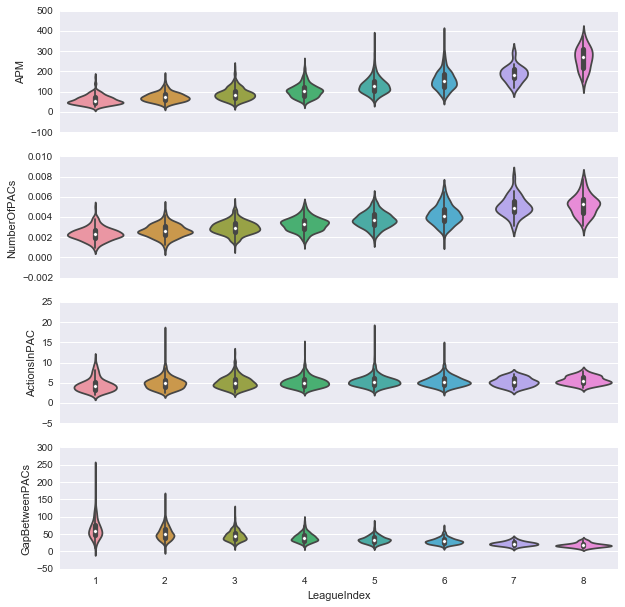

In [101]:
fig, axarr = plt.subplots(4, figsize=(10,10), sharex=True)

sns.violinplot(x='LeagueIndex', y='APM', data=sc, ax=axarr[0])
sns.violinplot(x='LeagueIndex', y='NumberOfPACs', data=sc, ax=axarr[1])
sns.violinplot(x='LeagueIndex', y='ActionsInPAC', data=sc, ax=axarr[2])
sns.violinplot(x='LeagueIndex', y='GapBetweenPACs', data=sc, ax=axarr[3])
axarr[0].set_xlabel('')
axarr[1].set_xlabel('')
axarr[2].set_xlabel('')

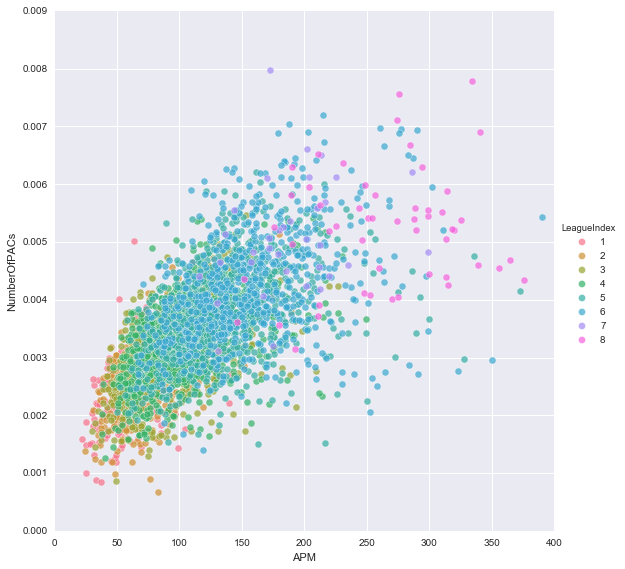

In [159]:
graph = sns.FacetGrid(sc, hue="LeagueIndex", size=8)
graph.map(plt.scatter, "APM", "NumberOfPACs", s=50, alpha=.7, linewidth=.5, edgecolor="white")
graph.add_legend();
graph.set(ylim=[0.000, 0.009])
graph.set(xlim=[0, 400])

<span style="font-size:1em; color:#d8506b">What else would you plot?</span>

### Now run a RandomForestClassifier, kNN and LogisticRegression. Which features are most important to being a professional?

### Plot your Decision Tree!
<span style="color:red">Fair Warning: This package is sort of buggy (mostly older OSX versions and Windows) and might not work for everyone. Read stackoverflow for any fixes</span>


##### REQUIREMENTS:
##### pip install pydot2
##### brew install graphviz (if you haven't installed brew: https://brew.sh/)

##### Use graphviz to make a chart of the classification tree decision points:
```
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

dtree = DecisionTreeClassifier()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
```